### Get data

In [46]:
import json 
import pandas as pd

df = pd.DataFrame()
with open("/Users/ryanyoung/Desktop/Projects/2Music/PersonalMusic/Spotify Extended Streaming History/Streaming_History_Audio_2017-2018_1.json", 'r', encoding="utf-8") as f:
    data = json.load(f)
    df = pd.DataFrame(data)


In [47]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode'],
      dtype='object')

In [48]:
artist_playtime = df.groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index()
artist_playtime = artist_playtime.sort_values(by='ms_played', ascending=False)

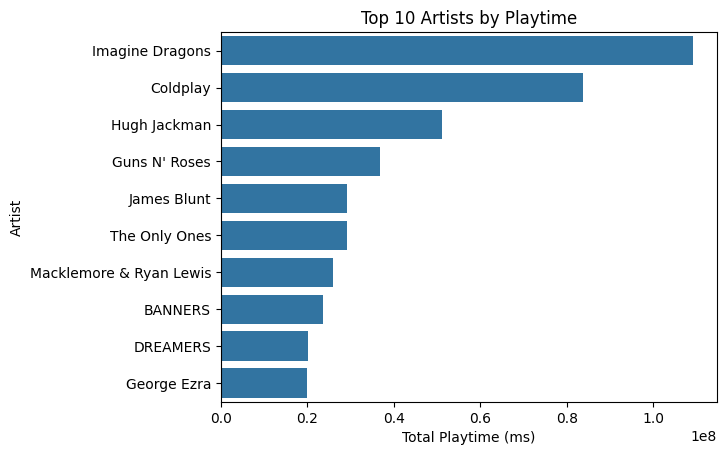

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 artists by playtime
top_artists = artist_playtime.head(10)
sns.barplot(x='ms_played', y='master_metadata_album_artist_name', data=top_artists)
plt.title("Top 10 Artists by Playtime")
plt.xlabel("Total Playtime (ms)")
plt.ylabel("Artist")
plt.show()